# Data Preprocessing

In [1]:
# Python Standard Libraries for importing data from binary file
import os.path #for accessing the file path
import struct  #for unpacking the binary data

import time    #for calculating time

#core packages
import numpy as np
import matplotlib.pyplot as plt

## Loading data from binary file downloaded from LuCan's site

In [2]:
#Original Code
import os, struct
from array import array as pyarray
from numpy import append, array, int8, uint8, zeros
import numpy as np

def load_mnist(dataset="training"):
    """
    Loads MNIST files into 3D numpy arrays

    Adapted from: http://abel.ee.ucla.edu/cvxopt/_downloads/mnist.py
    """
    
    digits = np.arange(10)
    path = "dataset/"
    size = 60000

    if dataset == "training":
        fname_img = os.path.join(path, 'train-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 'train-labels-idx1-ubyte')
    elif dataset == "testing":
        fname_img = os.path.join(path, 't10k-images-idx3-ubyte')
        fname_lbl = os.path.join(path, 't10k-labels-idx1-ubyte')
    else:
        raise ValueError("dataset must be 'testing' or 'training'")

    flbl = open(fname_lbl, 'rb')
    magic_nr, size = struct.unpack(">II", flbl.read(8))
    lbl = pyarray("b", flbl.read())
    flbl.close()

    fimg = open(fname_img, 'rb')
    magic_nr, size, rows, cols = struct.unpack(">IIII", fimg.read(16))
    img = pyarray("B", fimg.read())
    fimg.close()

    ind = [ k for k in range(size) if lbl[k] in digits ]
    N = len(ind)

    images = zeros((N, rows, cols), dtype=uint8)
    labels = zeros((N, 1), dtype=int8)
    for i in range(len(ind)):
        images[i] = array(img[ ind[i]*rows*cols : (ind[i]+1)*rows*cols ]).reshape((rows, cols))
        labels[i] = lbl[ind[i]]

    return images, labels.T

In [3]:
toc = time.time()
#loading the original data
training_x_orig, training_y_orig = load_mnist(dataset="training")
testing_x_orig, testing_y_orig = load_mnist(dataset="testing")

tic = time.time()
print("Time to load training and test set from binary file using numpy: " + str(1000*(tic-toc)) + "ms")


Time to load training and test set from binary file using numpy: 666.9595241546631ms


In [4]:
#modified Code
def load_data(dataset="training"):
    """
        Retrive MNIST dataset from  the binary file into numpy arrays        
        
        Dataset Obtained From:
            http://yann.lecun.com/exdb/mnist/
        Dataset retrival code adapted from(but modified to our need making data retrival 6-8 times faster):
            https://www.cs.virginia.edu/~connelly/class/2015/large_scale/proj2/mnist_python
            
        Argument:
            dataset - type of dataset to be loaded. may be either 'training' or 'test'
        Returns:
            images - 3D array consisting of no. of examples, rows, columns of images
            labels - array  containing labels for each images
    """
    digits = np.arange(10)
    path = "dataset/"
    size = 60000
    
    #setting file path based on the dataset
    if dataset == "training":
        img_file_path = os.path.join(path, 'train-images-idx3-ubyte')
        lbl_file_path = os.path.join(path, 'train-labels-idx1-ubyte')
    elif dataset == "testing":
        img_file_path = os.path.join(path, 't10k-images-idx3-ubyte')
        lbl_file_path = os.path.join(path, 't10k-labels-idx1-ubyte')
    else:
        raise ValueError("Dataset must be 'testing' or 'training'")
    
    #retriving the data
    with open(lbl_file_path, 'rb') as flbl:
        _, size = struct.unpack(">II", flbl.read(8))
        labels = np.frombuffer(flbl.read(), dtype=np.int8).reshape(1,size)

    with open(img_file_path, 'rb') as fimg:
        _, _, rows, cols = struct.unpack(">IIII", fimg.read(16))
        images = np.frombuffer(fimg.read(),dtype=np.uint8).reshape(size, rows, cols)

    return images, labels

In [5]:
toc = time.time()
#loading the original data
training_x_orig, training_y_orig = load_data(dataset="training")
testing_x_orig, testing_y_orig = load_data(dataset="testing")

tic = time.time()
print("Time to load training and test set from binary file using numpy: " + str(1000*(tic-toc)) + "ms")


Time to load training and test set from binary file using numpy: 130.9957504272461ms


### Confirming the shapes of the original data in the dataset

In [6]:
print("Data Types of the obtained data: ")
print("==================================")
print("Training Set Input Type:  " + str(type(training_x_orig)))
print("Training Set Output Type: " + str(type(training_y_orig)))
print("Test Set Input Type:      " + str(type(testing_x_orig)))
print("Test Set Output Type:     " + str(type(testing_y_orig)))

print("\nShape of the obtained data: ")
print("==================================")
print("Training Set Input Shape:  " + str(training_x_orig.shape))
print("Training Set Output Shape: " + str(training_y_orig.shape))
print("Test Set Input Shape:      " + str(testing_x_orig.shape))
print("Test Set Output Shape:     " + str(testing_y_orig.shape))


Data Types of the obtained data: 
Training Set Input Type:  <class 'numpy.ndarray'>
Training Set Output Type: <class 'numpy.ndarray'>
Test Set Input Type:      <class 'numpy.ndarray'>
Test Set Output Type:     <class 'numpy.ndarray'>

Shape of the obtained data: 
Training Set Input Shape:  (60000, 28, 28)
Training Set Output Shape: (1, 60000)
Test Set Input Shape:      (10000, 28, 28)
Test Set Output Shape:     (1, 10000)


### Visualizing Some of the sample digits from the test set with their label

In [7]:
def visualize_orig_sample(x_orig, y_orig):
    fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(16,8))
    fig.subplots_adjust(hspace=.2)
    fig.suptitle("Sample Digits")

    for ax,i in zip(axes.flatten(),range(1040,1050)):
        ax.imshow(x_orig[i].squeeze(),interpolation = "nearest")
        ax.set(title = "Label: "+ str(y_orig[0,i]))
        

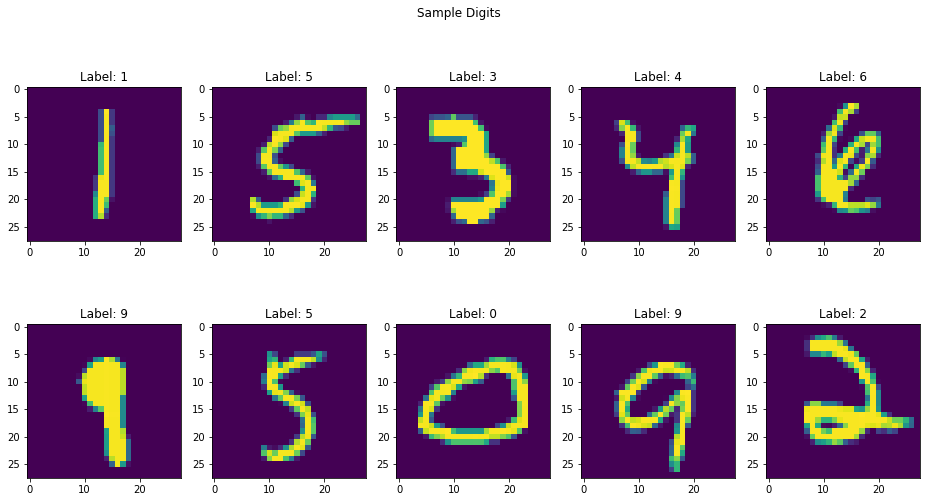

In [8]:
visualize_orig_sample(testing_x_orig,testing_y_orig)

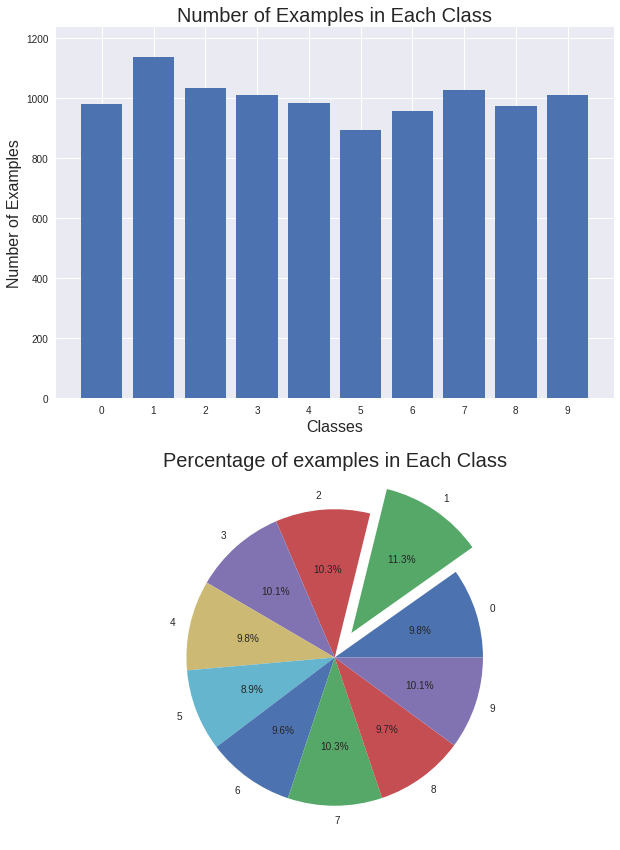

In [37]:
unique, counts = np.unique(testing_y_orig, return_counts=True)

plt.style.use('seaborn')
fig, axes = plt.subplots(nrows=2, ncols=1,figsize=(10,15))
fig.subplots_adjust(hspace=.2)

axes[0].bar(unique, counts)
axes[0].set(xticks = unique, ylim = (0,np.max(counts)+100))
axes[0].set_title("Number of Examples in Each Class", fontsize = 20)
axes[0].set_xlabel("Classes", fontsize = 16)
axes[0].set_ylabel("Number of Examples", fontsize = 16)


highest = np.argmax(counts)
explode = [0, 0, 0, 0,0,0,0,0,0,0]
explode[highest] = 0.2
axes[1].pie(counts, explode=explode, labels=unique, autopct='%1.1f%%')
axes[1].set_title("Percentage of examples in Each Class", fontsize = 20)

# ax[1,0].scatter(unique, counts)
# ax[1,0].plot(unique,counts)
plt.show()

## Dev/ Test split

In [9]:
def dev_test_split(test_x,test_y):
    m = test_y.shape[1]
    #suffling the test dataset
    randCol = np.random.permutation(m)
    suffled_x = test_x[randCol,:,:]
    suffled_y = test_y[:,randCol]
    
    #splitting into dev and test set
    dev_x = suffled_x[0:5000,:,:]
    dev_y = suffled_y[:,0:5000]
    
    test_x = suffled_x[5000:m,:,:]
    test_y = suffled_y[:,5000:m]
    
    assert(dev_x.shape == (5000,28,28))
    assert(dev_y.shape == (1,5000))
    assert(test_x.shape == (5000,28,28))
    assert(test_y.shape == (1,5000))
    
    return dev_x,dev_y,test_x,test_y

In [10]:
print(testing_x_orig.shape)
print(testing_y_orig.shape)

dev_x_orig,dev_y_orig,test_x_orig,test_y_orig = dev_test_split(testing_x_orig, testing_y_orig)
print(dev_x_orig.shape)
print(dev_y_orig.shape)
print(test_x_orig.shape)
print(test_y_orig.shape)

(10000, 28, 28)
(1, 10000)
(5000, 28, 28)
(1, 5000)
(5000, 28, 28)
(1, 5000)


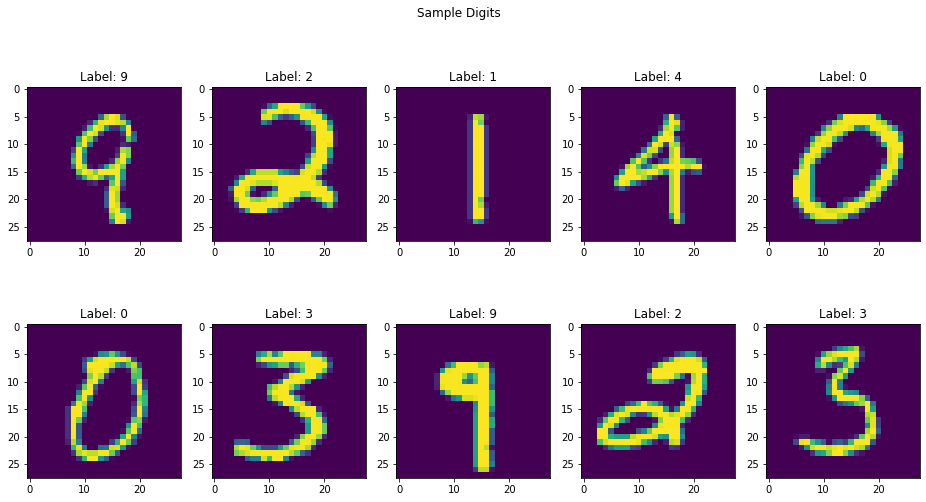

In [11]:
visualize_orig_sample(dev_x_orig,dev_y_orig)

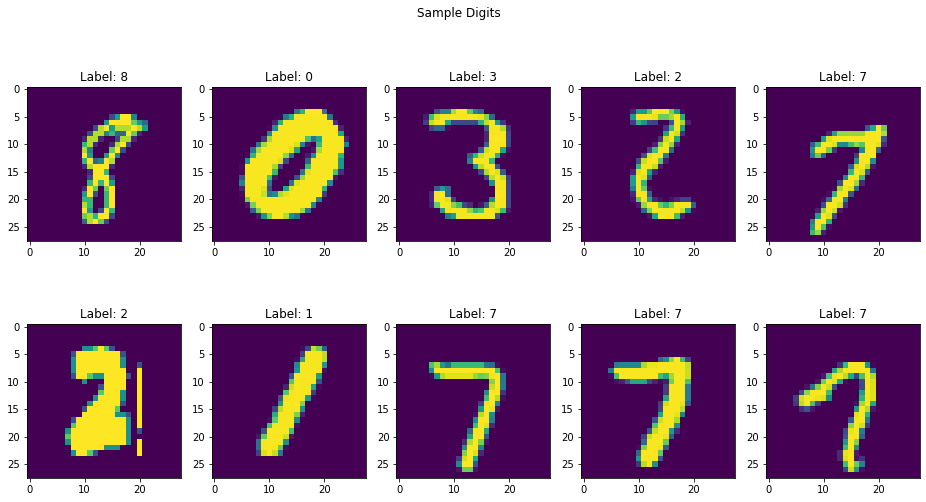

In [12]:
visualize_orig_sample(test_x_orig,test_y_orig)

## Preparing Input by flattenning/reshaping and normalizing the data

In [13]:
def prepare_input(training_x_orig,dev_x_orig,test_x_orig):
    
    
    train_x_flatten = training_x_orig.reshape(training_x_orig.shape[0], -1).T   # The "-1" makes reshape flatten the remaining dimensions
    dev_x_flatten = dev_x_orig.reshape(dev_x_orig.shape[0], -1).T   
    test_x_flatten = test_x_orig.reshape(test_x_orig.shape[0], -1).T

    # Normalizing the data into the range between 0 and 1.
    train_x_norm = train_x_flatten/255.
    dev_x_norm = dev_x_flatten/255.    
    test_x_norm = test_x_flatten/255.
    
    assert(train_x_norm.shape == (784,60000) )
    assert(dev_x_norm.shape == (784,5000) )    
    assert(test_x_norm.shape == (784,5000) )
    
    return train_x_norm,dev_x_norm,test_x_norm




In [14]:
train_x_norm,dev_x_norm,test_x_norm = prepare_input(training_x_orig,dev_x_orig, test_x_orig)
print ("Shape of Input Training set: " + str(train_x_norm.shape))
print ("Shape of Input Training set: " + str(dev_x_norm.shape))


print ("Shape of Input Test set:     " + str(test_x_norm.shape))

Shape of Input Training set: (784, 60000)
Shape of Input Training set: (784, 5000)
Shape of Input Test set:     (784, 5000)


## Preparing output by transforming the labels into one-hot representation

In [15]:
#encoding method 1..... 
def one_hot_encoding(raw_y):
   
    classes = np.arange(10).reshape(1,10)

    encoded_y = np.array(classes == raw_y[0,0]).astype(int)
    for i in range(1,raw_y.shape[1]):
        temp = np.array(classes == raw_y[0,i]).astype(int) 
        encoded_y = np.concatenate((encoded_y,temp),axis=0)
    
    assert(encoded_y.T.shape == (10,raw_y.shape[1]))
    
    return encoded_y.T

In [16]:
toc = time.time()
atrain_y = one_hot_encoding(training_y_orig)
atest_y = one_hot_encoding(testing_y_orig)
tic = time.time()
print ("Shape of Output Training set: " + str(atrain_y.shape))
print ("Shape of Output Test set:     " + str(atest_y.shape))
print("Time to encode: " + str(1000*(tic-toc)) + " ms")

Shape of Output Training set: (10, 60000)
Shape of Output Test set:     (10, 10000)
Time to encode: 13190.62328338623 ms


In [17]:
print(atrain_y[:,0:10],training_y_orig[0,0:10])
print(type(atrain_y[0,0]))
print(atest_y[:,0:10],testing_y_orig[0,0:10])
print(type(atest_y[0,0]))

[[0 1 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 1 0 1 0]
 [0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 0]
 [0 0 1 0 0 0 0 0 0 1]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 0 0 0 0]] [5 0 4 1 9 2 1 3 1 4]
<class 'numpy.int64'>
[[0 0 0 1 0 0 0 0 0 0]
 [0 0 1 0 0 1 0 0 0 0]
 [0 1 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0]
 [1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 1 0 1]] [7 2 1 0 4 1 4 9 5 9]
<class 'numpy.int64'>


this method seems to be taking a lot of time lets do something faster

In [18]:
#encoding method 2....
def one_hot_encoding_two(raw_y,no_of_classes = 10):
    
    classes = np.arange(no_of_classes + 1).reshape(no_of_classes+1,1)
    #the extra bit is to classify non digit images if encountered
    
    temp = np.zeros((classes.shape[0],raw_y.shape[1]))
    y_out = temp + classes
    
    for i in range(raw_y.shape[1]):
        y_out[:,i] = np.equal(y_out[:,i],raw_y[0,i])

    assert(y_out.shape == (classes.shape[0],raw_y.shape[1]))
    return y_out.astype(int)

In [19]:
toc = time.time()
##encoding the output of the training and the test dataset
train_y_onehot = one_hot_encoding_two(training_y_orig)
test_y_onehot = one_hot_encoding_two(testing_y_orig)

tic = time.time()

print ("Shape of Output Training set: " + str(train_y_onehot.shape))
print ("Shape of Output Test set:     " + str(test_y_onehot.shape))
print("Time to encode: " + str(1000*(tic-toc)) + " ms")


Shape of Output Training set: (11, 60000)
Shape of Output Test set:     (11, 10000)
Time to encode: 309.0848922729492 ms


In [20]:
#encoding method 3....
def one_hot_encoding_three(raw_y,no_of_classes = 10):
   
    #the extra bit is to classify non digit images if encountered
    
    y_encoded = np.zeros((no_of_classes + 1,raw_y.shape[1]))

    for index,val in enumerate(raw_y[0]):
        y_encoded[val,index] = 1

    assert(y_encoded.shape == (no_of_classes + 1,raw_y.shape[1]))
    return y_encoded

In [21]:
toc = time.time()
##encoding the output of the training and the test dataset
train_y_encoded = one_hot_encoding_three(training_y_orig)
test_y_encoded = one_hot_encoding_three(testing_y_orig)

tic = time.time()

print ("Shape of Output Training set: " + str(train_y_encoded.shape))
print ("Shape of Output Test set:     " + str(test_y_encoded.shape))
print("Time to encode: " + str(1000*(tic-toc)) + " ms")


Shape of Output Training set: (11, 60000)
Shape of Output Test set:     (11, 10000)
Time to encode: 68.84288787841797 ms


In [22]:
print(train_y_encoded[:,0:10],training_y_orig[0,0:10])
print(type(train_y_encoded[0,0]))
print(test_y_encoded[:,0:10],testing_y_orig[0,0:10])
print(type(test_y_encoded[0,0]))

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] [5 0 4 1 9 2 1 3 1 4]
<class 'numpy.float64'>
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] [7 2 1 0 4 1 4 9 5 9]
<class 'numpy.float64'>


The time taken by this method seems best among three methods I have tried

In [23]:
#encoding method 4....
def one_hot_encoding_four(raw_y,no_of_classes = 10):
   
    #the extra bit is to classify non digit images if encountered
    y_encoded = np.zeros((no_of_classes + 1,raw_y.shape[1]))
    y_encoded[raw_y,np.arange(raw_y.shape[1])] = 1

    assert(y_encoded.shape == (no_of_classes + 1,raw_y.shape[1]))
    return y_encoded

In [24]:
toc = time.time()
##encoding the output of the training and the test dataset
train_y_en = one_hot_encoding_four(training_y_orig)
test_y_en = one_hot_encoding_four(testing_y_orig)

tic = time.time()

print ("Shape of Output Training set: " + str(train_y_en.shape))
print ("Shape of Output Test set:     " + str(test_y_en.shape))
print("Time to encode: " + str(1000*(tic-toc)) + " ms")


Shape of Output Training set: (11, 60000)
Shape of Output Test set:     (11, 10000)
Time to encode: 4.553318023681641 ms


In [25]:
print(train_y_en[:,0:10],training_y_orig[0,0:10])
print(type(train_y_en[0,0]))
print(test_y_en[:,0:10],testing_y_orig[0,0:10])
print(type(test_y_en[0,0]))

[[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] [5 0 4 1 9 2 1 3 1 4]
<class 'numpy.float64'>
[[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 1. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] [7 2 1 0 4 1 4 9 5 9]
<class 'numpy.float64'>


In [26]:
#encoding method 5....
def one_hot_encoding_five(y_orig,no_of_classes = 10):
    
    #the extra bit is to classify non digit images if encountered
    y_encoded = np.eye(no_of_classes)[y_orig.reshape(-1)].T

    assert(y_encoded.shape == (no_of_classes ,y_orig.shape[1]))
    return y_encoded

In [27]:
toc = time.time()
##encoding the output of the training and the test dataset
train_y_encoded = one_hot_encoding_five(training_y_orig)
dev_y_encoded = one_hot_encoding_five(dev_y_orig)

test_y_encoded = one_hot_encoding_five(test_y_orig)

tic = time.time()

print ("Shape of Output Training set: " + str(train_y_encoded.shape))
print ("Shape of Output Test set:     " + str(test_y_encoded.shape))
print("Time to encode: " + str(1000*(tic-toc)) + " ms")


Shape of Output Training set: (10, 60000)
Shape of Output Test set:     (10, 5000)
Time to encode: 3.713369369506836 ms


#### Validating the encoding

In [28]:
print(train_y_encoded[:,50000:50010],training_y_orig[0,50000:50010])
print(type(train_y_encoded[0,0]))
print(dev_y_encoded[:,0:10],testing_y_orig[0,0:10])
print(type(dev_y_encoded[0,0]))
print(test_y_encoded[:,0:10],testing_y_orig[0,0:10])
print(type(test_y_encoded[0,0]))

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]] [3 8 6 9 6 4 5 3 8 4]
<class 'numpy.float64'>
[[0. 0. 0. 0. 0. 1. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 1. 1.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]] [7 2 1 0 4 1 4 9 5 9]
<class 'numpy.float64'>
[[1. 1. 0. 0. 1. 0. 1. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0

### Dev - Test set split

In [ ]:
train_x = train_x_norm
train_y = train_y_en
train_x_orig = training_x_orig
train_y_orig = training_y_orig

# def test_dev_split():
"""
    while splitting the dev-test, the splitting should not be done consucitively as done below 
    but should be done in random so that the data belonging to all classes fall in both the sets 
    with equal probability. 
    
    I, however, have splitted in this way because the data obtained from the binary file seems 
    to me in random distribution as while I observed them in the visualization above.
    
    incase the data is loaded from image in the folder arranged in class basis random selection should be done
"""


#original dev set data
dev_x_orig = testing_x_orig[0:5000, :, :] #original data is 3d ndarray
dev_y_orig = testing_y_orig[:, 0:5000]
#processed devset data
dev_x = test_x_norm[:, 0:5000]
dev_y = test_y_en[:, 0:5000]

#original test set data 
test_x_orig = testing_x_orig[5000:10000, :, :] #original data is 3d ndarray
test_y_orig = testing_y_orig[:, 5000:10000]
#processed test set data
test_x = test_x_norm[:, 5000:10000]
test_y = test_y_en[:, 5000:10000]

print("\nShape of the Final data: ")
print("==================================")
print("Training Set Input Shape:  ","Processed"+ str(train_x.shape) + ", Original"+str(train_x_orig.shape))
print("Training Set Output Shape: ","Processed" + str(train_y.shape) + " , Original"+str(train_y_orig.shape))
print("Dev Set Input Shape:       ","Processed" + str(dev_x.shape) + " , Original"+str(dev_x_orig.shape))
print("Dev Set Output Shape:      ","Processed" + str(dev_y.shape) + "  , Original"+str(dev_y_orig.shape))
print("Test Set Input Shape:      ","Processed" + str(test_x.shape) + " , Original"+str(test_x_orig.shape))
print("Test Set Output Shape:     ","Processed" + str(test_y.shape) + "  , Original"+str(test_y_orig.shape))



### Final Data forms

**Raw data:** <br>train_x_orig, train_y_orig<br>dev_x_orig, dev_y_orig <br> test_x_orig, test_y_orig <br><br>
**Processed data:**<br> train_x , train_y <br>  dev_x, dev_y <br>  test_x, test_y


# Sampling Dataset for Model Development and Experimentation

## Sampling from processed dataset

In [29]:
def sample_prepDataset(x,y, dataVol = 10):
    
    m = y.shape[1]
    sample_m = int(np.multiply(m,np.divide(dataVol,100))) #int(m*(dataVol/100))

    #suffling the dataset
    randCol = np.random.permutation(m)
    x_suffled = x[:,randCol]
    y_suffled = y[:,randCol]

    x_sample = x_suffled[:, 0:sample_m]
    y_sample = y_suffled[:, 0:sample_m]

    assert(x_sample.shape == (784,sample_m))
    assert(y_sample.shape == (10,sample_m))

    return dataVol, x_sample, y_sample

### Validating Sampled Dataset from processed dataset

In [30]:
train_Vol,train_x_sample, train_y_sample = sample_prepDataset(train_x_norm,train_y_encoded)
dev_Vol,dev_x_sample,dev_y_sample = sample_prepDataset(dev_x_norm,dev_y_encoded)
test_Vol,test_x_sample,test_y_sample = sample_prepDataset(test_x_norm,test_y_encoded)

print("Data\t\t\t","Complete Data Shape\t","Sample Data Shape\t","Sample Size")
print("=====================================================================================")
print("Training Set Images:\t"+ str(train_x_norm.shape)+"\t\t"+ str(train_x_sample.shape)+"\t\t"+str(train_Vol)+"%")
print("Training Set Labels:\t"+ str(train_y_encoded.shape)+"\t\t"+ str(train_y_sample.shape))
print("Dev Set Images:\t\t"+str(dev_x_norm.shape)+"\t\t"+ str(dev_x_sample.shape)+"\t\t"+str(dev_Vol)+"%")
print("Dev Set Labels:\t\t"+str(dev_y_encoded.shape)+"\t\t"+ str(dev_y_sample.shape))
print("Test Set Images:\t"+str(test_x_norm.shape)+"\t\t"+ str(test_x_sample.shape)+"\t\t"+str(test_Vol)+"%")
print("Test Set Labels:\t"+str(test_y_encoded.shape)+"\t\t"+ str(test_y_sample.shape))
print("=====================================================================================")


Data			 Complete Data Shape	 Sample Data Shape	 Sample Size
Training Set Images:	(784, 60000)		(784, 6000)		10%
Training Set Labels:	(10, 60000)		(10, 6000)
Dev Set Images:		(784, 5000)		(784, 500)		10%
Dev Set Labels:		(10, 5000)		(10, 500)
Test Set Images:	(784, 5000)		(784, 500)		10%
Test Set Labels:	(10, 5000)		(10, 500)


## Sampling from original dataset

In [31]:
def sample_origDataset(x,y, dataVol = 25):

    m = y.shape[0]
    sample_m = int(np.multiply(m,np.divide(dataVol,100))) #int(m*(dataVol/100)) 
    
    #suffling the original dataset
    randCol = np.random.permutation(m)
    x_suffled = x[randCol,:,:]
    y_suffled = y[randCol,:]
    

    x_sample = x_suffled[0:sample_m,:,:]
    y_sample = y_suffled[0:sample_m,:]

    assert(x_sample.shape == (sample_m,28,28))
    assert(y_sample.shape == (sample_m,1))

    return dataVol, x_sample, y_sample

In [32]:
train_Vol,train_x_sample, train_y_sample = sample_origDataset(training_x_orig,training_y_orig.T)
test_Vol,test_x_sample,test_y_sample = sample_origDataset(testing_x_orig, testing_y_orig.T)

print("Data\t\t\t","Complete Data Shape\t","Sample Data Shape\t","Sample Size")
print("=====================================================================================")
print("Training Set Images:\t"+ str(training_x_orig.shape)+"\t\t"+ str(train_x_sample.shape)+"\t\t"+str(train_Vol)+"%")
print("Training Set Labels:\t"+ str(training_y_orig.shape)+"\t\t"+ str(train_y_sample.shape))
print("Test Set Images:\t"+str(testing_x_orig.shape)+"\t\t"+ str(test_x_sample.shape)+"\t\t"+str(test_Vol)+"%")
print("Test Set Labels:\t"+str(testing_y_orig.shape)+"\t\t"+ str(test_y_sample.shape))
print("=====================================================================================")


Data			 Complete Data Shape	 Sample Data Shape	 Sample Size
Training Set Images:	(60000, 28, 28)		(15000, 28, 28)		25%
Training Set Labels:	(1, 60000)		(15000, 1)
Test Set Images:	(10000, 28, 28)		(2500, 28, 28)		25%
Test Set Labels:	(1, 10000)		(2500, 1)


In [33]:
def visualize_processed_sample(x_orig, y_orig, y_onehot, encoding = False, dataset = "training"):
    print(x_orig.shape,y_orig.shape)
    if(dataset == "training"):
        visual_title = "Sample Training Data Set"
        rng = range(1040,1050)
    elif(dataset == "dev"):
        visual_title = "Sample Dev Data Set"
        rng = range(100,110)
    elif(dataset == "test"):
        visual_title = "Sample Test Data Set"
        rng = range(1040,1050)        
    else:
        raise ValueError("Dataset set must be training or dev or test set")
    fig, axes = plt.subplots(nrows=2, ncols=5,figsize=(16,8))
    fig.subplots_adjust(hspace=.1)
    fig.suptitle(visual_title)

    for ax,i in zip(axes.flatten(),rng):
        ax.imshow(x_orig[i].squeeze())
        ax.set(title = "Label: "+ str(y_orig[0,i]))
        if(encoding == True):
            ax.set(xlabel= "Enc: "+ str(y_onehot[:,i]) )
    

(60000, 28, 28) (1, 60000)


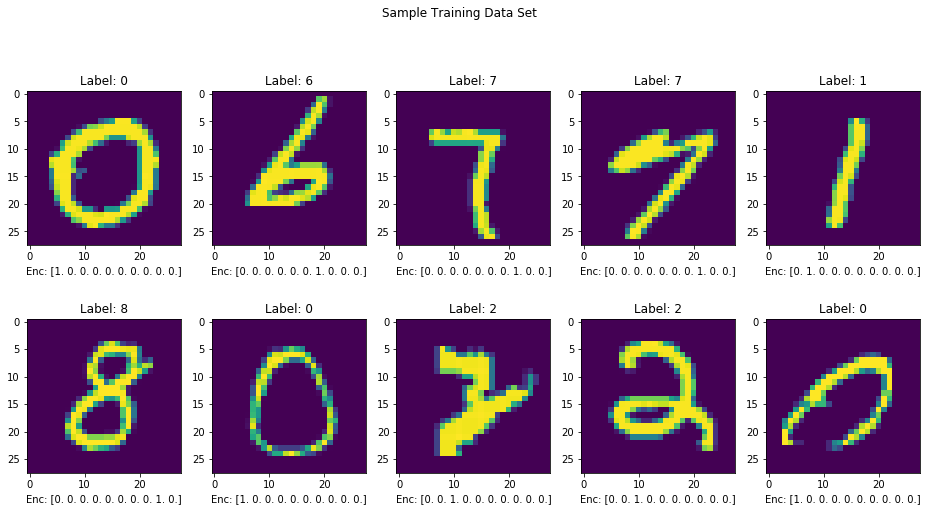

In [34]:
visualize_processed_sample(training_x_orig,training_y_orig, train_y_encoded, encoding = True, dataset = "training")

(5000, 28, 28) (1, 5000)


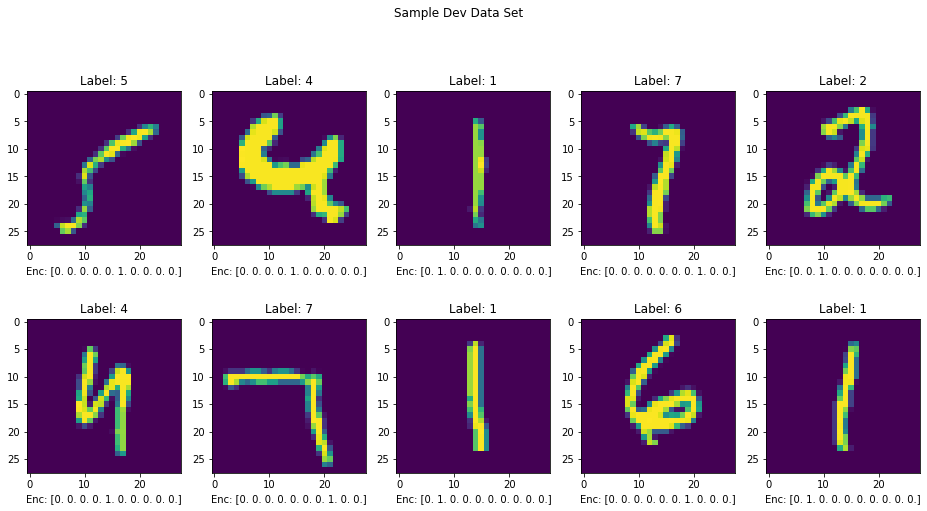

In [35]:
visualize_processed_sample(dev_x_orig, dev_y_orig, dev_y_encoded, encoding = True, dataset = "dev")

(5000, 28, 28) (1, 5000)


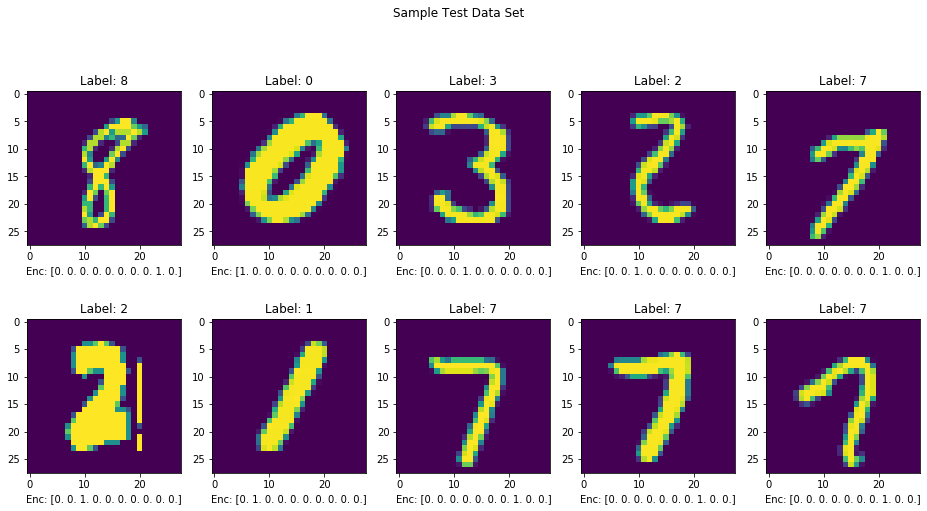

In [36]:
visualize_processed_sample(test_x_orig, test_y_orig, test_y_encoded, encoding = True, dataset="test")